# CNN

## Pre processing

In [1]:
import os
import shutil
import random
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from sklearn.preprocessing import LabelEncoder

# We import the data set from tensorflow and build the model there
import tensorflow as tf
from tensorflow.keras import layers, models

In [57]:
def extractPictures(face_crops_folder, new_path):
    
    # Counter for unique identifier
    counter = 1

    # Iterate through the subdirectories
    for subdir in os.listdir(face_crops_folder):
        if counter == 501:
            break
        subdir_path = os.path.join(face_crops_folder, subdir)
        
        # Check if it's a directory
        if os.path.isdir(subdir_path):
            # Iterate through the files in the subdirectory
            for file in os.listdir(subdir_path):
                file_path = os.path.join(subdir_path, file)
                
                # Check if it's a file
                if os.path.isfile(file_path):
                    # Get file extension
                    file_ext = os.path.splitext(file)[1]

                    # Create a new file name with the counter as a unique identifier
                    new_file_name = f"{os.path.splitext(file)[0]}_{counter}{file_ext}"
                    new_file_path = os.path.join(new_path, new_file_name)

                    # Move the file to the parent folder (FaceCrops) with the new name
                    shutil.move(file_path, new_file_path)

                    # Increment the counter
                    counter += 1

In [58]:
extractPictures("C:/Users/thoma/OneDrive/Escritorio/happy", "data/happy")
extractPictures("C:/Users/thoma/OneDrive/Escritorio/sad_images", "data/sad")
extractPictures("C:/Users/thoma/OneDrive/Escritorio/angry_faces", "data/anger")
extractPictures("C:/Users/thoma/OneDrive/Escritorio/neutralrun", "data/neutral")


In [60]:
# all images organized by directories
happy_dir = "data/happy"
sad_dir = "data/sad"
anger_dir = "data/anger"
neutral_dir = "data/neutral"

# paths for training set
train_happy_path = "data/train/happy/"
train_sad_path = "data/train/sad/"
train_neutral_path = "data/train/neutral/"
train_anger_path = "data/train/anger/"

# paths for testing set
test_happy_path = "data/test/happy/"
test_sad_path = "data/test/sad/"
test_neutral_path = "data/test/neutral/"
test_anger_path = "data/test/anger/"

# set percentage split
train_pct = 0.2
test_pct = 0.8

In [61]:
# Populate training and testing folders

for dir_path in [happy_dir, sad_dir, anger_dir, neutral_dir]:
    filenames = os.listdir(dir_path)
    # shuffle filenames randomly
    random.shuffle(filenames)
    # calculate split index
    split_idx = int(len(filenames) * train_pct)
    train_filenames = filenames[:split_idx]
    test_filenames = filenames[split_idx:]

    for filename in train_filenames:
        src = os.path.join(dir_path, filename)
        if "happy" in dir_path:
            dst = os.path.join(train_happy_path, filename)
        elif "sad" in dir_path:
            dst = os.path.join(train_sad_path, filename)
        elif "anger" in dir_path:
            dst = os.path.join(train_anger_path, filename)
        else:
            dst = os.path.join(train_neutral_path, filename)
        shutil.copyfile(src, dst)
    for filename in test_filenames:
        src = os.path.join(dir_path, filename)
        if "happy" in dir_path:
            dst = os.path.join(test_happy_path, filename)
        elif "sad" in dir_path:
            dst = os.path.join(test_sad_path, filename)
        elif "anger" in dir_path:
            dst = os.path.join(test_anger_path, filename)
        else:
            dst = os.path.join(test_neutral_path, filename)
        shutil.copyfile(src, dst)


In [62]:
train_dir = "data/train"
test_dir = "data/test"

# create list of train and test image paths and corresponding labels
train_image_paths = []
train_labels = []
for label in os.listdir(train_dir):
    for file in os.listdir(os.path.join(train_dir, label)):
        train_image_paths.append(os.path.join(train_dir, label, file))
        train_labels.append(label)

test_image_paths = []
test_labels = []
for label in os.listdir(test_dir):
    for file in os.listdir(os.path.join(test_dir, label)):
        test_image_paths.append(os.path.join(test_dir, label, file))
        test_labels.append(label)

train_images = []
test_images = []

for path in train_image_paths:
    img = Image.open(path)
    img_arr = np.array(img)
    train_images.append(img_arr)

for path in test_image_paths:
    img = Image.open(path)
    img_arr = np.array(img)
    test_images.append(img_arr)

train_images = np.array(train_images)
test_images = np.array(test_images)

# normalize pixel values between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

# convert labels to numpy arrays
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)


## Data Exploration

In [63]:
train_images

array([[[[0.48627451, 0.43137255, 0.38823529],
         [0.43137255, 0.35686275, 0.32941176],
         [0.49803922, 0.42745098, 0.38823529],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.36470588, 0.29803922, 0.26666667],
         [0.50980392, 0.43529412, 0.40784314],
         [0.5254902 , 0.41960784, 0.38431373],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.42745098, 0.36078431, 0.32941176],
         [0.39215686, 0.29803922, 0.27843137],
         [0.48235294, 0.38823529, 0.35686275],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        ...,

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]

In [64]:
train_labels

array(['anger', 'anger', 'anger', 'anger', 'anger', 'anger', 'anger',
       'anger', 'anger', 'anger', 'anger', 'anger', 'anger', 'anger',
       'anger', 'anger', 'anger', 'anger', 'anger', 'anger', 'anger',
       'anger', 'anger', 'anger', 'anger', 'anger', 'anger', 'anger',
       'anger', 'anger', 'anger', 'anger', 'anger', 'anger', 'anger',
       'anger', 'anger', 'anger', 'anger', 'anger', 'anger', 'anger',
       'anger', 'anger', 'anger', 'anger', 'anger', 'anger', 'anger',
       'anger', 'anger', 'anger', 'anger', 'anger', 'anger', 'anger',
       'anger', 'anger', 'anger', 'anger', 'anger', 'anger', 'anger',
       'anger', 'anger', 'anger', 'anger', 'anger', 'anger', 'anger',
       'anger', 'anger', 'anger', 'anger', 'anger', 'anger', 'anger',
       'anger', 'anger', 'anger', 'anger', 'anger', 'anger', 'anger',
       'anger', 'anger', 'anger', 'anger', 'anger', 'anger', 'anger',
       'anger', 'anger', 'anger', 'anger', 'anger', 'anger', 'anger',
       'anger', 'ang

In [65]:
unique_labels = os.listdir(train_dir)
unique_labels

['anger', 'happy', 'neutral', 'sad']

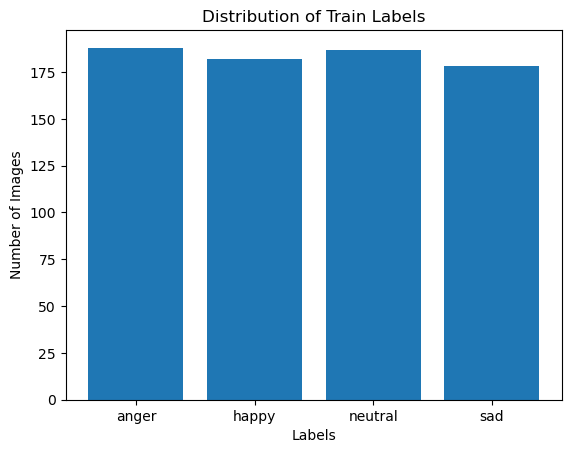

In [67]:
# Count the number of occurrences of each label
label_counts = {}
for label in train_labels:
    if label in label_counts:
        label_counts[label] += 1
    else:
        label_counts[label] = 1

# Plot the distribution of labels
plt.bar(label_counts.keys(), label_counts.values())
plt.title('Distribution of Train Labels')
plt.xlabel('Labels')
plt.ylabel('Number of Images')
plt.show()

In [68]:
# label encoding
label_encoder = LabelEncoder()
train_labels = label_encoder.fit_transform(train_labels)
test_labels = label_encoder.transform(test_labels)


In [69]:
train_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

Image size: 112 x 112


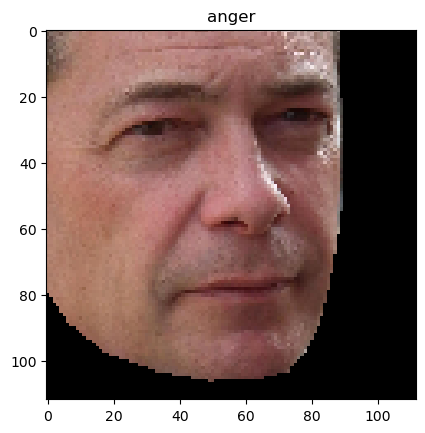

Image size: 112 x 112


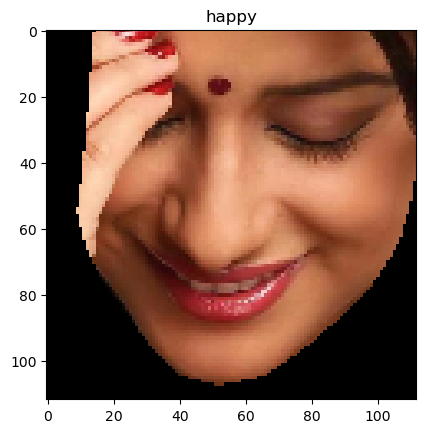

Image size: 112 x 112


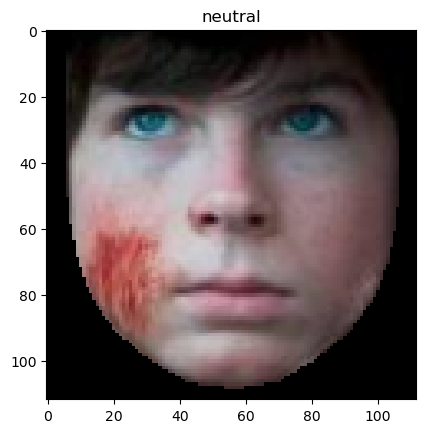

Image size: 112 x 112


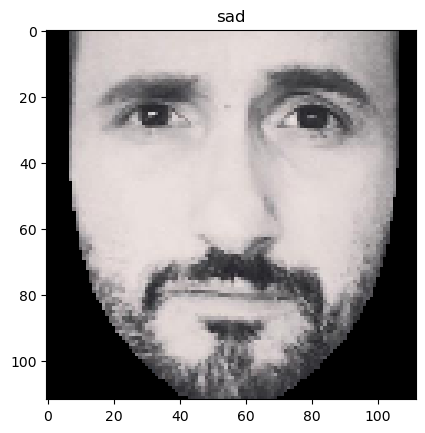

In [70]:
for label in unique_labels:
    label_dir = os.path.join(train_dir, label)
    image_paths = [os.path.join(label_dir, file) for file in os.listdir(label_dir)]
    img = Image.open(image_paths[0])
    width, height = img.size
    print("Image size:", width, "x", height)
    plt.imshow(img)
    plt.title(label)
    plt.show()

## Model

In [71]:
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [81]:
# References: https://towardsdatascience.com/using-convolutional-neural-network-for-image-classification-5997bfd0ede4 

# model = models.Sequential()
# model.add(layers.Conv2D(112, (3, 3), activation='relu', input_shape=(112, 112, 3)))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.Flatten())
# model.add(layers.Dense(64, activation='relu'))
# model.add(layers.Dense(10))

# model.summary()


In [82]:
# model = models.Sequential()
# model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(112, 112, 3)))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(32, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(16, (3, 3), activation='relu'))
# model.add(layers.Flatten())
# model.add(layers.Dropout(0.5))
# model.add(layers.Dense(64, activation='relu'))
# model.add(layers.Dense(10))

# model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 110, 110, 32)      896       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 55, 55, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 53, 53, 32)        9248      
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 26, 26, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 24, 24, 16)        4624      
                                                                 
 flatten_9 (Flatten)         (None, 9216)             

In [88]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping


# Load pre-trained VGG16 model without the top layer
vgg16_model = VGG16(weights='imagenet', include_top=False, input_shape=(112, 112, 3))

# Freeze the pre-trained layers
for layer in vgg16_model.layers:
    layer.trainable = False

# Create new model by adding your layers on top of pre-trained model
model = models.Sequential()
model.add(vgg16_model)
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10))

model.summary()

# Compile the model
model.compile(optimizer='adam', 
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

# Data augmentation
datagen = ImageDataGenerator(rotation_range=20, 
                             width_shift_range=0.1, 
                             height_shift_range=0.1, 
                             horizontal_flip=True)

# Fit the model with data augmentation and early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
history = model.fit(datagen.flow(train_images, train_labels, batch_size=32),
                    epochs=50, 
                    validation_data=(test_images, test_labels),
                    callbacks=[early_stopping])


Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 3, 3, 512)         14714688  
                                                                 
 flatten_12 (Flatten)        (None, 4608)              0         
                                                                 
 dense_24 (Dense)            (None, 128)               589952    
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_25 (Dense)            (None, 10)                1290      
                                                                 
Total params: 15,305,930
Trainable params: 591,242
Non-trainable params: 14,714,688
_________________________________________________________________
Epoch 1/50
23/23 [=================

In [83]:

model.compile(optimizer='adam', 
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=15, 
                    validation_data=(test_images, test_labels))

Epoch 1/15
23/23 [==============================] - 13s 492ms/step - loss: 1.4942 - accuracy: 0.2435 - val_loss: 1.4181 - val_accuracy: 0.2479
Epoch 2/15
23/23 [==============================] - 7s 316ms/step - loss: 1.3958 - accuracy: 0.3401 - val_loss: 1.3610 - val_accuracy: 0.3175
Epoch 3/15
23/23 [==============================] - 6s 282ms/step - loss: 1.3243 - accuracy: 0.3891 - val_loss: 1.3197 - val_accuracy: 0.3877
Epoch 4/15
23/23 [==============================] - 8s 332ms/step - loss: 1.2520 - accuracy: 0.4463 - val_loss: 1.2833 - val_accuracy: 0.4063
Epoch 5/15
23/23 [==============================] - 8s 340ms/step - loss: 1.1786 - accuracy: 0.4857 - val_loss: 1.2465 - val_accuracy: 0.4409
Epoch 6/15
23/23 [==============================] - 8s 367ms/step - loss: 1.1278 - accuracy: 0.5129 - val_loss: 1.3366 - val_accuracy: 0.4007
Epoch 7/15
23/23 [==============================] - 7s 307ms/step - loss: 0.9814 - accuracy: 0.5918 - val_loss: 1.2746 - val_accuracy: 0.4652
Epoch

## Results

In [86]:
from sklearn.metrics import classification_report


y_pred = model.predict(test_images)
predicted_labels = np.argmax(y_pred, axis=1)
report = classification_report(test_labels, predicted_labels)
print(report)

56/56 [==============================] - 166s 3s/step
              precision    recall  f1-score   support

           0       0.44      0.64      0.52       437
           1       0.74      0.67      0.70       439
           2       0.42      0.43      0.42       443
           3       0.47      0.29      0.36       448

    accuracy                           0.50      1767
   macro avg       0.52      0.51      0.50      1767
weighted avg       0.51      0.50      0.50      1767



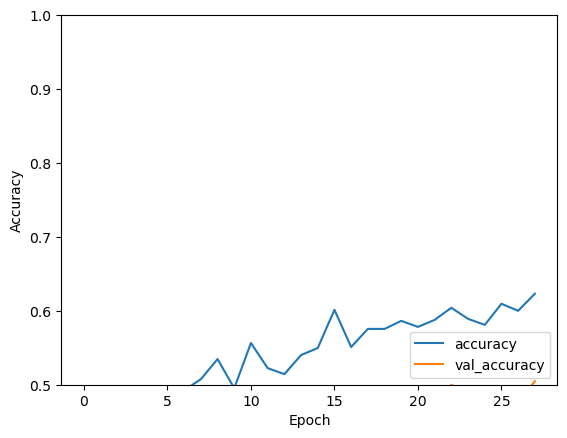

In [87]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')